In [1]:
!pip install pip install general_config
!pip install constants
!pip install constants
!pip install medpy
!pip install pynrrd
!pip install scipy==1.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for constants: filename=constants-0.6.0-py3-none-any.whl size=5473 sha256=af0a95a8913e01085810c72aaf2d2f8251fee4cd49daa1b088d7e763be29a43a
  Stored in directory: /root/.cache/pip/wheels/77/ac/b2/89268490b92bf6fd0102b3634668042437e0e024c64ef447a1
Successfully built constants
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 14.3 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size

In [2]:
import os
import itertools
import re
from time import time

import json
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
from torchvision import transforms
import nrrd
import scipy
import scipy.io
from pathlib import Path
import numpy as np
from torch import nn 
from torch.utils.data import DataLoader
import torchvision.transforms as T
import random

In [9]:
os.chdir('imATFIB_master')

In [10]:
from imATFIB_master.models._2D_Unet import UNet
from imATFIB_master import main
from imATFIB_master.utils.training_utils import prints, training_setup
from imATFIB_master.ACDC_metrics import load_nii
from imATFIB_master.utils.params import Params, validate_params
from imATFIB_master.utils.visualization import show_images


import imATFIB_master.general_config
import imATFIB_master.constants
from imATFIB_master.training import train
from imATFIB_master.utils.dataset_utils import data_normalization
from imATFIB_master.utils.params import Params, validate_params
from imATFIB_master.utils.training_utils import prints, training_setup
from imATFIB_master.utils.ROI_crop import roi_crop

Cannot import NVIDIA Apex...
Cannot import NVIDIA Apex...
Cannot import NVIDIA Apex...


In [11]:
def preprocess_x(x):
    x = x.astype(np.float32)
    x = torch.from_numpy(x)
    x = x.to(torch.float32)
    m, n = x.shape
    x = x.resize(1, m, n)
    return x.to('cuda')

In [12]:
def read_data(file_name_x, file_name_y=None):
    X, header = nrrd.read(file_name_x)
    if file_name_y is not None:
        Y, header_seg = nrrd.read(file_name_y)
        return X, Y

In [13]:
def tensor_for_plt(tensor):
    return tensor.to('cpu').detach().numpy()

In [14]:
torch.device('cpu:0')
torch.cuda.is_available()

True

In [16]:
config = Params('../config.json')
params = Params('../params.json')

In [17]:
model_checkpoint_path = '../model/model.pt'
model= training_setup.model_setup(params, config)
checkpoint = torch.load(model_checkpoint_path)
model.load_state_dict(checkpoint)

Number of classes:  4


<All keys matched successfully>

In [18]:
p1_x, p1_y = read_data('../test/de_a_1.nrrd', '../test/la_seg_a_1.nrrd')

/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:761: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


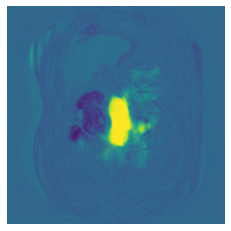

In [19]:
for i in range(20, 28):
    p1_20_y_pred = model(preprocess_x(p1_x[:, :, i]).resize(1, 1, 864, 864))
    plt.imshow(tensor_for_plt(p1_20_y_pred[0, 1, :, :]),  alpha=0.5)
    plt.gca().set_axis_off()
    plt.savefig(f'../fig/p1_{i}_predict_best_model.png', dpi=256, bbox_inches="tight", pad_inches=0.0)